# UK Traffic Accidents Predictions (Datos de seguridad vial)

<h1>Tabla de Contenidos<span class="tocSkip"></span></h1>
<div class="toc">
   <ul class="toc-item">
      <li>
         <span><a href="#Problem-Definition" data-toc-modified-id="Problem-Definition-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem Definition</a></span>
         <ul class="toc-item">
            <li><span><a href="#Project-Overview" data-toc-modified-id="Project-Overview-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Project Overview</a></span></li>
            <li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Problem Statement</a></span></li>
         </ul>
      </li>
      <li>
         <span><a href="#Dataset-Analysis" data-toc-modified-id="Dataset-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dataset Analysis</a></span>
         <ul class="toc-item">
            <li><span><a href="#Importing-Python-libraries" data-toc-modified-id="Importing-Python-libraries-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Importing Python libraries</a></span></li>
            <li><span><a href="#Importing-the-data" data-toc-modified-id="Importing-the-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Importing the data</a></span></li>
            <li>
               <span><a href="#Data-Description-and-Exploratory-Visualisations" data-toc-modified-id="Data-Description-and-Exploratory-Visualisations-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Data Description and Exploratory Visualisations</a></span>
               <ul class="toc-item">
                  <li><span><a href="#Overview" data-toc-modified-id="Overview-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Overview</a></span></li>
                  <li><span><a href="#Numerical-features-overview" data-toc-modified-id="Numerical-features-overview-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Numerical features overview</a></span></li>
               </ul>
            </li>
            <li>
               <span><a href="#Feature-distribution-by-target-attribute" data-toc-modified-id="Feature-distribution-by-target-attribute-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Feature distribution by target attribute</a></span>
               <ul class="toc-item">
                  <li><span><a href="#Accident-severity" data-toc-modified-id="Age-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Accident severity</a></span></li>
                  <li><span><a href="#Number-of-vehicles" data-toc-modified-id="Education-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Number of vehicles</a></span></li>
                  <li><span><a href="#Number-of-casualties" data-toc-modified-id="Gender-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Number of casualties</a></span></li>
                  <li><span><a href="#Day-of-week" data-toc-modified-id="Marital-Status-2.4.4"><span class="toc-item-num">2.4.4&nbsp;&nbsp;</span>Day of week</a></span></li>
                  <li><span><a href="#Police-office-attend" data-toc-modified-id="Distance-from-Home-2.4.5"><span class="toc-item-num">2.4.5&nbsp;&nbsp;</span>Police office attend</a></span></li>
                  <li><span><a href="#Sex-of-driver" data-toc-modified-id="Department-2.4.6"><span class="toc-item-num">2.4.6&nbsp;&nbsp;</span>Sex of driver</a></span></li>
                  <li><span><a href="#Age-of-driver" data-toc-modified-id="Role-and-Work-Conditions-2.4.7"><span class="toc-item-num">2.4.7&nbsp;&nbsp;</span>Age of driver</a></span></li>
                  <li><span><a href="#Age-of-vehicle" data-toc-modified-id="Years-at-the-Company-2.4.8"><span class="toc-item-num">2.4.8&nbsp;&nbsp;</span>Age of vehicle</a></span></li>
                  <li><span><a href="#Sex-of-casualty" data-toc-modified-id="Years-With-Current-Manager-2.4.9"><span class="toc-item-num">2.4.9&nbsp;&nbsp;</span>Sex of casualty</a></span></li>
                  <li><span><a href="#Age-of-casualty" data-toc-modified-id="Work-Life-Balance-Score-2.4.10"><span class="toc-item-num">2.4.10&nbsp;&nbsp;</span>Age of casualty</a></span></li>
                  <li><span><a href="#Casualty-severity" data-toc-modified-id="Pay/Salary-Employee-Information-2.4.11"><span class="toc-item-num">2.4.11&nbsp;&nbsp;</span>Casualty severity</a></span></li>
                  <li><span><a href="#Car-passenger" data-toc-modified-id="Employee-Satisfaction-and-Performance-Information-2.4.12"><span class="toc-item-num">2.4.12&nbsp;&nbsp;</span>Car passenger</a></span></li>
               </ul>
          </ul>
            </li> 
    </ul>
                    <span><a href="#Building-Machine-Learning-Models" data-toc-modified-id="Building-Machine-Learning-Models-4"><span class="toc-item-num">3&nbsp;&nbsp;</span>Building Machine Learning Models</a></span>
         <ul class="toc-item">
            <li><span><a href="#Baseline-Algorithms" data-toc-modified-id="Baseline-Algorithms-4.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li>
                <li>
               <span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-4.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Support Vector Machine</a></span>
            </li>
                        <li>
               <span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-4.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Decission Tree Classifier</a></span>
            </li>
              <li>
               <span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-4.2"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Gradient Boosted Tree</a></span>
            </li>
             </ul>
      <li>
         <span><a href="#Concluding-Remarks" data-toc-modified-id="Concluding-Remarks-5"><span class="toc-item-num">4&nbsp;&nbsp;</span>Concluding Remarks</a></span>
       </li>
</div>

## Problem Definition

Partimos de 3 .csv que guardan los datos de los accidentes, victimas y vehiculos de UK del año 2020. Fueron descargados desde la pagina oficial del gobierno de Gran Bretaña https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data

De esos 3 .csv iniciales, los unificamos en uno solo mediante el identificador del accidente y después (ya solo con un .csv) filtramos y obtenemos los datos que nos interesan para luego implementar los modelos. 

<img src='data/problemOverview.jpg'>

## Dataset Analysis

En este caso de estudio, se ha obtenido un conjunto de datos de Road Safety Data de [Find Open Data](https://data.gov.uk/)  <br>

Como se indica en el [Sitio web del Dataset](https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data) 
<em>Estos archivos proporcionan datos detallados de seguridad vial sobre las circunstancias de los accidentes de tráfico con lesiones personales en Gran Bretaña desde 1979 (aunque nosotros usaremos únicamente los más actuales disponibles, los de 2020) los tipos de vehículos implicados y las víctimas resultantes. Las estadísticas se refieren únicamente a los accidentes con lesiones personales en la vía pública que se notifican a la policía, y que posteriormente se registran, utilizando el formulario de notificación de accidentes STATS19.<br>Todas las variables de datos están codificadas en lugar de contener cadenas textuales. Las tablas de búsqueda están disponibles en la sección "Recursos adicionales" hacia la parte inferior de la tabla.También incluye: Los resultados de los datos de las pruebas de alcoholemia de los dispositivos digitales de pruebas de alcoholemia introducidos recientemente, proporcionados por las autoridades policiales de Inglaterra y Gales Los resultados de los niveles de alcohol en sangre (miligramos / 100 mililitros de sangre) proporcionados por el cotejo de los datos de los médicos forenses (proporcionados por los médicos forenses de Inglaterra y Gales y por los Procuradores Fiscales de Escocia) con los datos de víctimas mortales de los datos policiales STATS19 de accidentes de tráfico en Gran Bretaña. Los casos en los que los niveles de alcohol en sangre de una víctima mortal son "desconocidos" son consecuencia de una coincidencia infructuosa entre los dos conjuntos de datos.</em>


### Importing Python libraries

#### Imports globales

In [2]:
import os
import pandas as pd
import numpy as np

# importing libraries for data visualisations
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from scipy.stats import norm
import matplotlib
%matplotlib inline
color = sns.color_palette()
from IPython.display import display
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
pd.options.display.max_columns = None
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

#### Imports del modelo de regresion lineal

In [3]:
from sklearn.linear_model import LogisticRegression

#### Imports del modelo del arbol de regresion

In [4]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split                                                
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text                
from sklearn.metrics import accuracy_score, classification_report 

#### Imports del modelo de Gradient Boosted Tree

In [110]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler

### Importing the data

Importamos el conjuntos de datos, contamos con 3 archivos CSV que previamente unificaremos en uno solo con las variables que nos 
interesen para proceder con el estudio.

In [5]:
#Read csv file
df_vehicles = pd.read_csv('data/dft-road-casualty-statistics-vehicle-2020.csv')
df_accidents = pd.read_csv('data/dft-road-casualty-statistics-accident-2020.csv')
df_casualties = pd.read_csv('data/dft-road-casualty-statistics-casualty-2020.csv')
#Shape of CSV
print("El primer CSV contiene: {} (filas x columnas)".format(df_vehicles.shape))
print("El segundo CSV contiene: {} (filas x columnas)".format(df_accidents.shape))
print("El tercer CSV contiene: {} (filas x columnas)".format(df_casualties.shape))

C:\Users\RICARDO\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning:

Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.



El primer CSV contiene: (167375, 27) (filas x columnas)
El segundo CSV contiene: (91199, 36) (filas x columnas)
El tercer CSV contiene: (115584, 18) (filas x columnas)


Unificamos los 3 csv anteriores usando merge function con how='inner'. Dado el propio funcionamiento de la funcion lo deberemos hacer en dos partes (df_vehicles + df_accidents) + df_casualties

In [6]:
#Unificamos df_accidents con df_vehicles
df_traffic_accidents_v1 = pd.merge(df_accidents, df_vehicles, how='inner')

#Unificamos df_traffic_accidents_v1 con df_casualties
df_traffic_accidents = pd.merge(df_traffic_accidents_v1, df_casualties, how='inner')
print("El archivo CSV final contiene: {} (filas x columnas)".format(df_traffic_accidents.shape))

El archivo CSV final contiene: (92450, 74) (filas x columnas)


### Data Description and Explorator & Visualisations

> En esta sección, proporcionaremos visualizaciones de datos que resumen o extraen características relevantes de los rasgos de nuestro conjunto de datos. Veamos cada columna en detalle, para comprender mejor el conjunto de datos y agruparlos cuando sea apropiado. Además
de agrupaciones también se eliminarán aquellos cuya información no sea relevante o aporte interés en el caso de estudio.

#### Overview

In [7]:
#Visualizamos la cabecera del nuestro dataframe
df_traffic_accidents.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,2020010278554,2020,010278554,531639.0,168889.0,-0.108858,51.403761,1,2,2,1,09/11/2020,2,20:20,20,E09000008,E09000008,5,0,6,20,0,-1,6,0,0,0,4,1,2,0,0,1,1,2,E01000994,2,3,0,6,7,7,0,0,0,0,0,0,3,1,6,1,23,5,113,1,4,SUZUKI UK 110,-1,-1,1,1,1,23,5,2,0,0,0,0,0,3,-1,-1
1,2020010278556,2020,010278556,528687.0,184702.0,-0.145519,51.546549,1,2,2,1,04/11/2020,4,11:50,2,E09000007,E09000007,5,0,6,30,3,4,6,0,9,9,1,1,9,0,0,1,3,2,E01000927,1,3,0,99,9,9,99,9,9,99,9,99,9,1,6,1,17,4,125,1,4,HONDA CBR125R,1,1,1,1,1,17,4,2,0,0,0,0,0,3,1,1
2,2020010278558,2020,010278558,534296.0,179438.0,-0.066682,51.497938,1,3,2,1,09/11/2020,2,19:31,8,E09000028,E09000028,3,200,2,20,3,2,5,0,0,5,4,1,2,0,0,1,1,2,E01004022,1,3,0,15,3,7,0,2,0,0,0,0,2,1,1,1,45,7,125,1,0,YAMAHA GPD 125,3,1,1,1,1,45,7,3,0,0,0,0,0,3,1,3
3,2020010278559,2020,010278559,530354.0,172580.0,-0.125965,51.437228,1,3,2,1,09/11/2020,2,19:13,9,E09000022,E09000022,5,0,6,30,0,-1,6,0,0,5,4,1,2,0,0,1,1,2,E01003151,1,3,0,18,4,8,0,0,0,0,0,0,4,1,6,1,45,7,124,1,7,-1,6,1,1,1,1,45,7,3,0,0,0,0,0,3,1,6
4,2020010278561,2020,010278561,534946.0,184874.0,-0.055243,51.546633,1,2,1,1,09/11/2020,2,18:03,4,E09000012,E09000012,6,0,6,20,3,2,6,0,0,5,4,8,2,0,0,1,1,2,E01001762,1,11,0,7,5,7,0,2,0,0,0,0,4,1,1,1,52,8,6700,2,2,ALEXANDER DENNIS MODEL MISSING,3,1,1,3,1,42,7,2,1,1,0,0,0,0,1,2


In [8]:
# Dataset columns
df_traffic_accidents.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location', 'vehicle_reference',
       'vehicle_type', 'towing_and_articulation', 'vehicle_manoeuvre',
     

> El conjunto de datos contiene varias columnas numéricas y categóricas que proporcionan información variada sobre los datos de accidentes
de seguridad vial sobre las circunstancias de los accidentes de tráfico con lesiones personales en Gran Bretaña desde 1979, los tipos de vehículos implicados y las víctimas resultantes. Las estadísticas se refieren únicamente a los accidentes con lesiones personales en la vía pública que se notifican a la policía, y que posteriormente se registran. 

In [9]:
# desglosemos las columnas por su tipo (es decir, int64, float64, object)
df_traffic_accidents.columns.to_series().groupby(df_traffic_accidents.dtypes).groups

{int64: ['accident_year', 'police_force', 'accident_severity', 'number_of_vehicles', 'number_of_casualties', 'day_of_week', 'local_authority_district', 'first_road_class', 'first_road_number', 'road_type', 'speed_limit', 'junction_detail', 'junction_control', 'second_road_class', 'second_road_number', 'pedestrian_crossing_human_control', 'pedestrian_crossing_physical_facilities', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident', 'trunk_road_flag', 'vehicle_reference', 'vehicle_type', 'towing_and_articulation', 'vehicle_manoeuvre', 'vehicle_direction_from', 'vehicle_direction_to', 'vehicle_location_restricted_lane', 'junction_location', 'skidding_and_overturning', 'hit_object_in_carriageway', 'vehicle_leaving_carriageway', 'hit_object_off_carriageway', 'first_point_of_impact', 'vehicle_left_hand_drive', 'journey_purpose_of_driver', 'sex_of_driver'

> Seguimos filtrando nuestros datos, para ello, eliminamos y agrupamos aquellos que nos interesan 

In [10]:
df_traffic_accidents['accident_severity'].unique().tolist()

[2, 3, 1]

In [11]:
#Eliminamos columnas 
df_traffic_accidents.drop(df_traffic_accidents.columns.difference(['accident_index','accident_referene','accident_severity','number_of_vehicles',
                                                                  'number_of_casualties','date','day_of_week','time', 
                                                                    'did_police_officer_attend_scene_of_accident','sex_of_driver',
                                                                  'age_of_driver','age_of_vehicle','generic_make_model',
                                                                  'sex_of_casualty','age_of_casualty','casualty_severity',
                                                                   'car_passenger']), 1, inplace=True)

<ipython-input-11-70ab78920ba1>:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [12]:
#Comprobamos de nuevo nuestro dataframe y sus columnas por tipo de dato
df_traffic_accidents.columns.to_series().groupby(df_traffic_accidents.dtypes).groups

{int64: ['accident_severity', 'number_of_vehicles', 'number_of_casualties', 'day_of_week', 'did_police_officer_attend_scene_of_accident', 'sex_of_driver', 'age_of_driver', 'age_of_vehicle', 'sex_of_casualty', 'age_of_casualty', 'casualty_severity', 'car_passenger'], object: ['accident_index', 'date', 'time', 'generic_make_model']}

> Se han reducido considerablemente el número de columnas

In [13]:
# Columnas de tipos de datos y valores perdidos
df_traffic_accidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92450 entries, 0 to 92449
Data columns (total 16 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   accident_index                               92450 non-null  object
 1   accident_severity                            92450 non-null  int64 
 2   number_of_vehicles                           92450 non-null  int64 
 3   number_of_casualties                         92450 non-null  int64 
 4   date                                         92450 non-null  object
 5   day_of_week                                  92450 non-null  int64 
 6   time                                         92450 non-null  object
 7   did_police_officer_attend_scene_of_accident  92450 non-null  int64 
 8   sex_of_driver                                92450 non-null  int64 
 9   age_of_driver                                92450 non-null  int64 
 10  age_of_veh

> Los datos proporcionados no tienen valores perdidos. En este tipo de análisis es poco problable que los datos de los accidentes presenten una gran proporción de valores perdidos, ya que los departamentos de policía o similiar a la DGT en Gran Bretaña suelen almacenar todos los datos archivados en excel, papel o similar. La pérdida de información es nula.

#### Numerical features overview

In [14]:
df_traffic_accidents.describe()

,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,did_police_officer_attend_scene_of_accident,sex_of_driver,age_of_driver,age_of_vehicle,sex_of_casualty,age_of_casualty,casualty_severity,car_passenger
count,92450.000000,92450.000000,92450.000000,92450.000000,92450.000000,92450.000000,92450.000000,92450.000000,92450.000000,92450.000000,92450.000000,92450.000000
mean,2.733196,1.914797,1.688956,4.121763,1.299557,1.359145,38.249811,6.226652,1.377307,37.012385,2.789919,0.230211
std,0.487699,0.753750,1.422487,1.950286,0.517392,0.531522,18.512320,6.563575,0.499984,19.382243,0.440414,0.571656
min,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000
25%,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,25.000000,0.000000,1.000000,22.000000,3.000000,0.000000
50%,3.000000,2.000000,1.000000,4.000000,1.000000,1.000000,36.000000,5.000000,1.000000,34.000000,3.000000,0.000000
75%,3.000000,2.000000,2.000000,6.000000,2.000000,2.000000,51.000000,11.000000,2.000000,51.000000,3.000000,0.000000
max,3.000000,13.000000,41.000000,7.000000,3.000000,3.000000,99.000000,96.000000,9.000000,99.000000,3.000000,9.000000


Obtenemos también unos plot de los valores que toman cada variable, que luego analizaremos una a una.

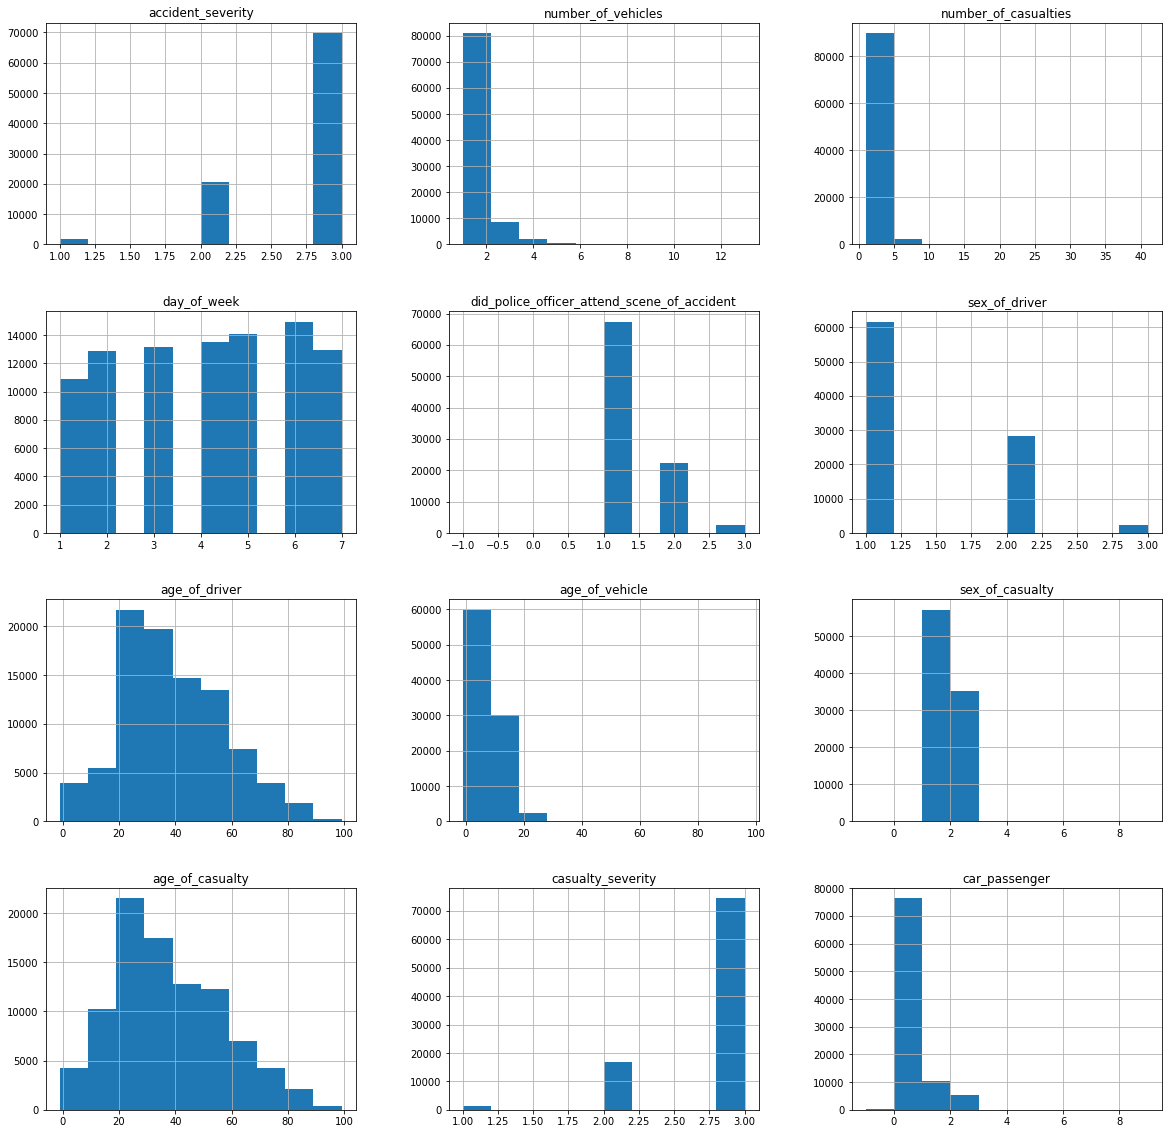

In [15]:
df_traffic_accidents.hist(figsize=(20,20))
plt.show()

### Feature distribution by target attribute

#### Accident severity

> Indica la gravedad del accidente de una escala del 1 al 3.

In [16]:
df_traffic_accidents['accident_severity'].value_counts()

3    69736
2    20762
1     1952
Name: accident_severity, dtype: int64

#### Number of vehicles

> Indica el numero de vehiculos involucrados en el accidente. Rango (1,12)

In [17]:
df_traffic_accidents['number_of_vehicles'].value_counts()

2     57178
1     23738
3      8620
4      2075
5       511
6       208
7        53
8        40
10        9
9         9
11        6
13        2
12        1
Name: number_of_vehicles, dtype: int64

#### Number of casualties

> Indica el numero de victimas involucrados en el accidente. Rango (1,19)

In [18]:
df_traffic_accidents['number_of_casualties'].value_counts()

1     56941
2     20672
3      8409
4      3692
5      1510
6       624
7       287
8        96
9        54
41       41
11       33
10       30
19       19
17       17
13       13
12       12
Name: number_of_casualties, dtype: int64

#### Day of week

> Indica el día de la semana. Formato: de lunes (1) a domingo (7)

In [19]:
df_traffic_accidents['day_of_week'].value_counts()

6    14951
5    14096
4    13534
3    13180
7    12942
2    12854
1    10893
Name: day_of_week, dtype: int64

#### Police office attend

> Indica si hubo asistencia policial durante el rescate. Valores: 1, 2, 3 (varian en funcion del tiempo de llegada)

In [20]:
df_traffic_accidents['did_police_officer_attend_scene_of_accident'].value_counts()

 1    67425
 2    22352
 3     2672
-1        1
Name: did_police_officer_attend_scene_of_accident, dtype: int64

#### Sex of driver

> Indica el sexo del conductor. Formato : 1 Hombre, 2 Mujer, 3 Otro.

In [21]:
# Sex of drivers
df_traffic_accidents['sex_of_driver'].value_counts()

1    61667
2    28363
3     2420
Name: sex_of_driver, dtype: int64

#### Age of driver

> Indica la edad del conductor.

In [22]:
# Age of drivers
df_traffic_accidents['age_of_driver'].value_counts()

-1     3770
 30    2620
 19    2290
 29    2228
 25    2220
       ... 
 94       5
 99       3
 3        2
 98       2
 97       1
Name: age_of_driver, Length: 98, dtype: int64

#### Age of vehicle

> Indica la edad del vehículo.

In [23]:
df_traffic_accidents['age_of_vehicle'].value_counts()

-1     22903
 4      4814
 1      4705
 5      4692
 6      4366
       ...  
 54        1
 84        1
 92        1
 64        1
 63        1
Name: age_of_vehicle, Length: 70, dtype: int64

#### Sex of casualty

> Indica el sexo de la víctima.

In [24]:
df_traffic_accidents['sex_of_casualty'].value_counts()

 1    57048
 2    35212
-1      185
 9        5
Name: sex_of_casualty, dtype: int64

#### Age of casualty

> Indica la edad de la victima.

In [25]:
df_traffic_accidents['age_of_casualty'].value_counts()

19    2426
30    2377
20    2306
18    2299
22    2204
      ... 
94      14
96      11
98       7
99       2
97       2
Name: age_of_casualty, Length: 101, dtype: int64

#### Casualty severity

> Indica el estado de la victima tras el accidente.

In [26]:
df_traffic_accidents['casualty_severity'].value_counts()

3    74323
2    16832
1     1295
Name: casualty_severity, dtype: int64

#### Car passenger

> Indica el número de pasajeros en el coche en el momento del accidente.

In [27]:
df_traffic_accidents['car_passenger'].value_counts()

 0    76258
 1    10398
 2     5453
-1      309
 9       32
Name: car_passenger, dtype: int64

#### Generic_make_model

Marca y modelo del vehiculo

In [28]:
df_traffic_accidents['generic_make_model'].value_counts()

-1                26272
FORD FIESTA        3207
VAUXHALL CORSA     2685
VAUXHALL ASTRA     2217
FORD FOCUS         2111
                  ...  
SEAT EXEO             2
IVECO STRALIS         1
BYD ENVIRO            1
YAMAHA X-MAX          1
NISSAN E-NV200        1
Name: generic_make_model, Length: 691, dtype: int64

Obtenemos ahora una distribución normalizada por sexos de la severidad del accidente y sus niveles.

In [29]:
print("Distribución normalizada por sexos de la severidad del accidente baja(3) en el conjunto de datos: Hombre = {:.1f}%; Mujer {:.1f}%.".format((df_traffic_accidents[(df_traffic_accidents['accident_severity'] == 3) & (
    df_traffic_accidents['sex_of_driver'] == 1)].shape[0] / df_traffic_accidents[df_traffic_accidents['sex_of_driver'] == 1].shape[0])*100, (df_traffic_accidents[(df_traffic_accidents['accident_severity'] == 3) & (df_traffic_accidents['sex_of_driver'] == 2)].shape[0] / df_traffic_accidents[df_traffic_accidents['sex_of_driver'] == 2].shape[0])*100))
print("Distribución normalizada por sexos de la severidad del accidente media(2) en el conjunto de datos: Hombre = {:.1f}%; Mujer {:.1f}%.".format((df_traffic_accidents[(df_traffic_accidents['accident_severity'] == 2) & (
    df_traffic_accidents['sex_of_driver'] == 1)].shape[0] / df_traffic_accidents[df_traffic_accidents['sex_of_driver'] == 1].shape[0])*100, (df_traffic_accidents[(df_traffic_accidents['accident_severity'] == 2) & (df_traffic_accidents['sex_of_driver'] == 2)].shape[0] / df_traffic_accidents[df_traffic_accidents['sex_of_driver'] == 2].shape[0])*100))
print("Distribución normalizada por sexos de la severidad del accidente alta(1) en el conjunto de datos: Hombre = {:.1f}%; Mujer {:.1f}%.".format((df_traffic_accidents[(df_traffic_accidents['accident_severity'] == 1) & (
    df_traffic_accidents['sex_of_driver'] == 1)].shape[0] / df_traffic_accidents[df_traffic_accidents['sex_of_driver'] == 1].shape[0])*100, (df_traffic_accidents[(df_traffic_accidents['accident_severity'] == 1) & (df_traffic_accidents['sex_of_driver'] == 2)].shape[0] / df_traffic_accidents[df_traffic_accidents['sex_of_driver'] == 2].shape[0])*100))

Distribución normalizada por sexos de la severidad del accidente baja(3) en el conjunto de datos: Hombre = 72.4%; Mujer 81.5%.
Distribución normalizada por sexos de la severidad del accidente media(2) en el conjunto de datos: Hombre = 25.0%; Mujer 17.2%.
Distribución normalizada por sexos de la severidad del accidente alta(1) en el conjunto de datos: Hombre = 2.6%; Mujer 1.3%.


In [30]:
(mu, sigma) = norm.fit(df_traffic_accidents.loc[df_traffic_accidents['casualty_severity'] == 1, 'age_of_casualty'])
print(
    'Accidentados gravedad 1: edad media = {:.1f} años y desviación estándar = {:.1f}'.format(mu, sigma))
(mu, sigma) = norm.fit(df_traffic_accidents.loc[df_traffic_accidents['casualty_severity'] == 2, 'age_of_casualty'])
print('Accidentados gravedad 2: edad media = {:.1f} años y desviación estándar = {:.1f}'.format(
    mu, sigma))
(mu, sigma) = norm.fit(df_traffic_accidents.loc[df_traffic_accidents['casualty_severity'] == 3, 'age_of_casualty'])
print(
    'Accidentados gravedad 3: edad media = {:.1f} años y desviación estándar = {:.1f}'.format(mu, sigma))

Accidentados gravedad 1: edad media = 47.0 años y desviación estándar = 21.7
Accidentados gravedad 2: edad media = 39.6 años y desviación estándar = 20.5
Accidentados gravedad 3: edad media = 36.2 años y desviación estándar = 19.0


Comparamos el sexo del conductor con la gravedad del accidente. **Nota**: nos acordamos que el sexo eran 3 valores (1 hombre 2 mujer 3 otro/no se tiene costancia) y  la gravedad del accidente (1 grave 2 hospitalizado y 3 accidente fortuito y normal)

In [31]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

ModuleNotFoundError: No module named 'cufflinks'

In [ ]:
df_Gender = pd.DataFrame(columns=["sex_of_driver", "% accidente"])
i=0
for field in list(df_traffic_accidents['sex_of_driver'].unique()):
    ratio = df_traffic_accidents[(df_traffic_accidents['sex_of_driver']==field)&(df_traffic_accidents['accident_severity']==3)].shape[0] / df_traffic_accidents[df_traffic_accidents['sex_of_driver']==field].shape[0]
    df_Gender.loc[i] = (field, ratio*100)
    i += 1 
df_G = df_Gender.groupby(by="sex_of_driver").sum()
df_G.iplot(kind='bar',title='Sexo del conductor vs Gravedad del accidente (%)')

In [32]:
df_Gender = pd.DataFrame(columns=["number_of_vehicles", "number_of_casualties"])
i=0
for field in list(df_traffic_accidents['number_of_vehicles'].unique()):
    ratio = df_traffic_accidents[(df_traffic_accidents['number_of_vehicles']==field)&(df_traffic_accidents['number_of_casualties']==3)].shape[0] / df_traffic_accidents[df_traffic_accidents['number_of_vehicles']==field].shape[0]
    df_Gender.loc[i] = (field, ratio*100)
    i += 1 
df_G = df_Gender.groupby(by="number_of_vehicles").sum()
df_G.iplot(kind='bar',title=' Num de vehiculos vs Num de victimas')

AttributeError: 'DataFrame' object has no attribute 'iplot'

Ahora obtenemos un plot que representa la edad de la victima con la gravedad de daños causados a ella. 

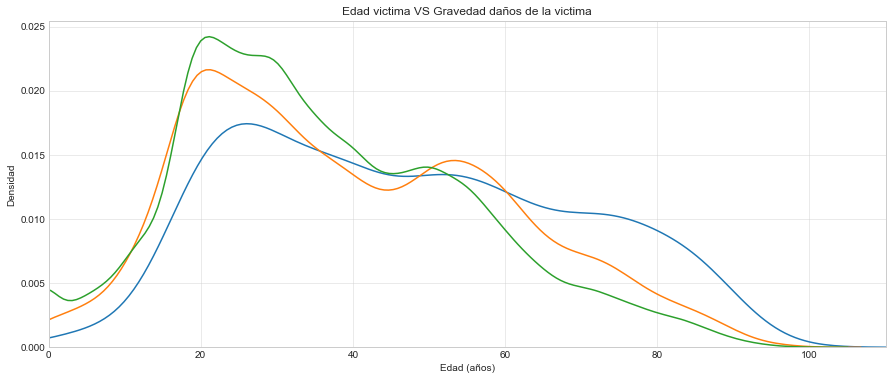

In [33]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-whitegrid')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_traffic_accidents.loc[df_traffic_accidents['casualty_severity'] == 1, 'age_of_casualty'], label = 'Accidentados gravedad 1')
sns.kdeplot(df_traffic_accidents.loc[df_traffic_accidents['casualty_severity'] == 2, 'age_of_casualty'], label = 'Accidentados gravedad 2')
sns.kdeplot(df_traffic_accidents.loc[df_traffic_accidents['casualty_severity'] == 3, 'age_of_casualty'], label = 'Accidentados gravedad 3')
plt.xlim(left=0, right=110)
plt.xlabel('Edad (años)')
plt.ylabel('Densidad')
plt.title('Edad victima VS Gravedad daños de la victima');

## Aplicación de modelos de machine learning

## Logistic Regression

La regresión logística, a pesar de su nombre, es un modelo lineal para clasificación en lugar de regresión. En este modelo, las probabilidades que describen los posibles resultados de un solo ensayo se modelan utilizando una función logística. Neustro objetivo será, crear un modelo que tras pasarle una serie de columnas (por ejemplo la gravedad del accidente o datos de la victima como edad y sexo) consiga predecir el resultado de otra (como la gravedad de los daños ocasionados a la victima.)

Con el fin de usar solo un pequeño rango de campos para que la regresion logistica tenga el efecto que deseamos, eliminamos algunos valores "inutiles" para este caso (como la hora o el dia de la semana que no influyen para saber la gravedad de un accidente) y eliminamos tambien aquellos valores que no son cuantitativos. 

In [34]:
df_traffic_accidents.dropna(['date', 'time', 'accident_index', 'day_of_week', 'generic_make_model', 'car_passenger','did_police_officer_attend_scene_of_accident','sex_of_casualty','age_of_vehicle','age_of_driver','generic_make_model'] == -1)

<ipython-input-34-007f73395c6e>:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.dropna will be keyword-only



,accident_index,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,did_police_officer_attend_scene_of_accident,sex_of_driver,age_of_driver,age_of_vehicle,generic_make_model,sex_of_casualty,age_of_casualty,casualty_severity,car_passenger
0,2020010278554,2,2,1,09/11/2020,2,20:20,1,1,23,4,SUZUKI UK 110,1,23,2,0
1,2020010278556,2,2,1,04/11/2020,4,11:50,3,1,17,4,HONDA CBR125R,1,17,2,0
2,2020010278558,3,2,1,09/11/2020,2,19:31,1,1,45,0,YAMAHA GPD 125,1,45,3,0
3,2020010278559,3,2,1,09/11/2020,2,19:13,1,1,45,7,-1,1,45,3,0
4,2020010278561,2,1,1,09/11/2020,2,18:03,1,1,52,2,ALEXANDER DENNIS MODEL MISSING,1,42,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92445,2020990963785,2,1,1,11/07/2020,7,19:29,2,1,51,20,YAMAHA YZF R1,1,51,2,0
92446,2020990963795,3,2,1,27/05/2020,4,18:27,1,1,36,-1,-1,1,36,3,0
92447,2020990963798,3,1,1,11/07/2020,7,09:48,1,1,83,6,MITSUBISHI ASX,2,40,3,0
92448,2020990963826,2,3,1,11/07/2020,7,13:25,2,1,52,21,-1,1,52,2,0


In [35]:
df_traffic_accidents = df_traffic_accidents.reindex(columns = ['accident_severity', 'number_of_vehicles', 'number_of_casualties', 'day_of_week', 'did_police_officer_attend_scene_of_accident', 'sex_of_driver', 'age_of_driver', 'age_of_vehicle', 'sex_of_casualty', 'age_of_casualty', 'car_passenger', 'casualty_severity'])

In [36]:
df_traffic_accidents.head()

,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,did_police_officer_attend_scene_of_accident,sex_of_driver,age_of_driver,age_of_vehicle,sex_of_casualty,age_of_casualty,car_passenger,casualty_severity
0,2,2,1,2,1,1,23,4,1,23,0,2
1,2,2,1,4,3,1,17,4,1,17,0,2
2,3,2,1,2,1,1,45,0,1,45,0,3
3,3,2,1,2,1,1,45,7,1,45,0,3
4,2,1,1,2,1,1,52,2,1,42,0,2


In [37]:
df_traffic_accidents_lg = df_traffic_accidents.drop(['number_of_casualties','day_of_week', 'did_police_officer_attend_scene_of_accident',
                                                    'sex_of_driver','age_of_vehicle','age_of_driver', 'car_passenger'], axis=1)

Estos seran las columnas usadas para llevar a cabo la regresion logistica mientras que la última (casualty_severity) sera la usada para predecir. De lo que se trata es de haber obtenido solo columnas vitales para nuestro modelo. Que de verdad aporten valor útil a la predicción que haremos. 

In [38]:
df_traffic_accidents_lg.head()

,accident_severity,number_of_vehicles,sex_of_casualty,age_of_casualty,casualty_severity
0,2,2,1,23,2
1,2,2,1,17,2
2,3,2,1,45,3
3,3,2,1,45,3
4,2,1,1,42,2


Estas son las columnas que mejor representan los valores importantes para la predicción. Las obtuvimos tras hacer pruebas con el modelo y viendo que valores eran importantes para predecir si un accidente era mortal (1) o no muy severo(3).

Hacemos las particiones testeo y entrenamiento y aplicamos el modelo. Con la funcion train_test_split, divide el conjunto de datos, en subconjunto de entrenamiento y validacion, y subconjunto de testeo

In [39]:
X_train, X_test, y_train, y_test = train_test_split(df_traffic_accidents_lg.drop('casualty_severity', axis=1), df_traffic_accidents_lg['casualty_severity'])

In [40]:
lr = LogisticRegression(solver = 'lbfgs', max_iter = 100)
lr.fit(X_train, y_train)

C:\Users\RICARDO\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

### Análisis de resultados

En los dos primeros casos vamos a ver la importancia que tienen las columnas accident_severity y number_of_vehicles. Para accidentes  de 1 o 2 lo más probable es obtener un 2 como máximo mientras que para accidentes de 3 es poco abitual obtener valores como 1 o 2. En el primer caso, para una mujer de 65 con un accidente fuerte y 1 coche involucrado moriria en el momento mientras que para un hombre de 16 años en un accidente grave con 6 coches involucrados sería hospitalizado. 

In [41]:
lr.predict(np.array([[1,1,2,65]]))[0]

C:\Users\RICARDO\miniconda3\lib\site-packages\sklearn\base.py:445: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



1

In [42]:
lr.predict(np.array([[1,6,1,16]]))[0]

C:\Users\RICARDO\miniconda3\lib\site-packages\sklearn\base.py:445: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



1

En estos dos siguientes casos nos centraremos en las variables edad y sexo de la victima dado que van a resultar ser de vital importancia. En ambos casos pondremos la situación de un accidente "grave" con 3 coches involucrados y mientras que en uno se trata de un mujer de 65 y en otro de un hombre de 35. En el primer caso sería un accidente mortal mientras que el segundo sería hospitalizado. 

In [43]:
lr.predict(np.array([[1,3,1,35]]))[0]

C:\Users\RICARDO\miniconda3\lib\site-packages\sklearn\base.py:445: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



2

In [44]:
lr.predict(np.array([[1,3,2,65]]))[0]

C:\Users\RICARDO\miniconda3\lib\site-packages\sklearn\base.py:445: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



1

Y obviamente para los accidentes de grado 3, siempre (o en la mayoría de casos) obtendremos unos daños poco graves para la victima. En estos casos la variable más importante será el número de vehiculos involucrados, pero no será habitual ver que la variable cambie. 

In [45]:
lr.predict(np.array([[3,6,2,65]]))[0]

C:\Users\RICARDO\miniconda3\lib\site-packages\sklearn\base.py:445: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



3

In [46]:
lr.predict(np.array([[3,1,1,35]]))[0]

C:\Users\RICARDO\miniconda3\lib\site-packages\sklearn\base.py:445: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



3

## Decission Tree Classifier

Un árbol de decisión es una estructura de árbol similar a un diagrama de flujo donde un nodo interno representa una característica (o atributo), la rama representa una regla de decisión y cada nodo hoja representa el resultado. Divide el árbol de manera recursiva y lo llama partición recursiva. Esta estructura similar a un diagrama de flujo le ayuda en la toma de decisiones. Es una visualización como un diagrama de flujo que imita fácilmente el pensamiento a nivel humano. Es por eso que los árboles de decisión son fáciles de entender e interpretar. Lo que haremos será lo siguiente:

<img src='data/TreeProblemOverview.jpg' >

Source: https://www.datacamp.com/community/tutorials/decision-tree-classification-python 

Obtenemos el dataframe con el que vamos a trabajar.

In [47]:
df_traffic_accidents_dt = df_traffic_accidents.drop(['number_of_casualties','day_of_week', 'did_police_officer_attend_scene_of_accident',
                                                    'sex_of_driver','age_of_vehicle','age_of_driver', 'car_passenger'], axis=1)

In [48]:
df_traffic_accidents_dt.head()

,accident_severity,number_of_vehicles,sex_of_casualty,age_of_casualty,casualty_severity
0,2,2,1,23,2
1,2,2,1,17,2
2,3,2,1,45,3
3,3,2,1,45,3
4,2,1,1,42,2


Nos creamos nuestro árbol con un max_depth de 5 que será los niveles que tendrá. La entropía no es mas que una medida de información que indica el desorden de las características con el objetivo, obtiene su valor máximo cuando la probabilidad de las dos clases es la misma y un nodo es puro cuando la entropía tiene su valor mínimo, que es 0.

Los resultados obtenidos utilizando el criterio de entropía son ligeramente mejores que los de gini que es la otra opción que tenemos en criterion.

In [49]:
arbol = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)

Selección de características. Aquí, debe dividir las columnas dadas en dos tipos de variables dependientes (o variable de destino) y variables independientes (o variables de características). En nuestro array de grados ponemos los grados que tiene nuestra variable principal, casualty-severity, que serán los mismo que dijimos anteriormente. Después dividimos en X e Y el df, el X con todo menos la variable principal y el Y solo con la variable principal.

In [50]:
grados = ['Fallecimiento', 'Hospitalización', 'Indemne']

In [51]:
X = df_traffic_accidents_dt.drop('casualty_severity', axis = 1)                                                   
y = df_traffic_accidents_dt.casualty_severity

Con la funcion train_test_split, divide el conjunto de datos, en subconjunto de entrenamiento y validacion, y subconjunto de testeo. Con el test_size el 70% de los datos, seran para entrenar y validar el modelo y el 30% restante sera para testear el modelo creado

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 1)     

In [53]:
arbol.fit(X_train,y_train)  

DecisionTreeClassifier(criterion='entropy', max_depth=3)

Ahora hacemos la predicion de los grados de accidentes a la que pertenece, el conjunto de datos de testeo (conjunto nunca visto por el modelo) El "print("Conjunto de test: \n" , X_test)" muestra del conjunto seleccionado para el testeo del modelo creado. El "print("\n Grado del accidente clasificados: \n", pred)" los grados de accidente que ha predicho el modelo y el "print("Accuracy:", accuracy_score(y_test, pred)) " indica la precision con la cual acierta el modelo creado (Conjunto real vs predicion del modelo)

In [54]:
pred = arbol.predict(X_test)
print(classification_report(y_test, pred, target_names = grados, zero_division = 0))
print("Conjunto de test: \n" , X_test)                                                         
print("\n Grado del accidente clasificados: \n", pred)                                               
print("Accuracy:", accuracy_score(y_test, pred))
caracteristicas = df_traffic_accidents_dt.columns
features = caracteristicas.tolist()
features.remove('casualty_severity')

                 precision    recall  f1-score   support

  Fallecimiento       0.67      1.00      0.80       401
Hospitalización       0.79      0.98      0.88      5000
        Indemne       1.00      0.94      0.97     22334

       accuracy                           0.95     27735
      macro avg       0.82      0.97      0.88     27735
   weighted avg       0.96      0.95      0.95     27735

Conjunto de test: 
        accident_severity  number_of_vehicles  sex_of_casualty  age_of_casualty
20990                  3                   2                1               61
43383                  3                   1                1               28
21607                  3                   2                2               55
81337                  3                   2                2               27
11119                  3                   2                2               10
...                  ...                 ...              ...              ...
23134                  2 

### Análisis de resultados

Podemos ver que por ejemplo para cuando ha predicho Fallecimiento, el modelo tiene una precision del 70% mientras que para cuando sale indemne acierta todas en todos los casos, por lo que es más fiable.

Ahora simplemente podemos imprimir el árbol. 

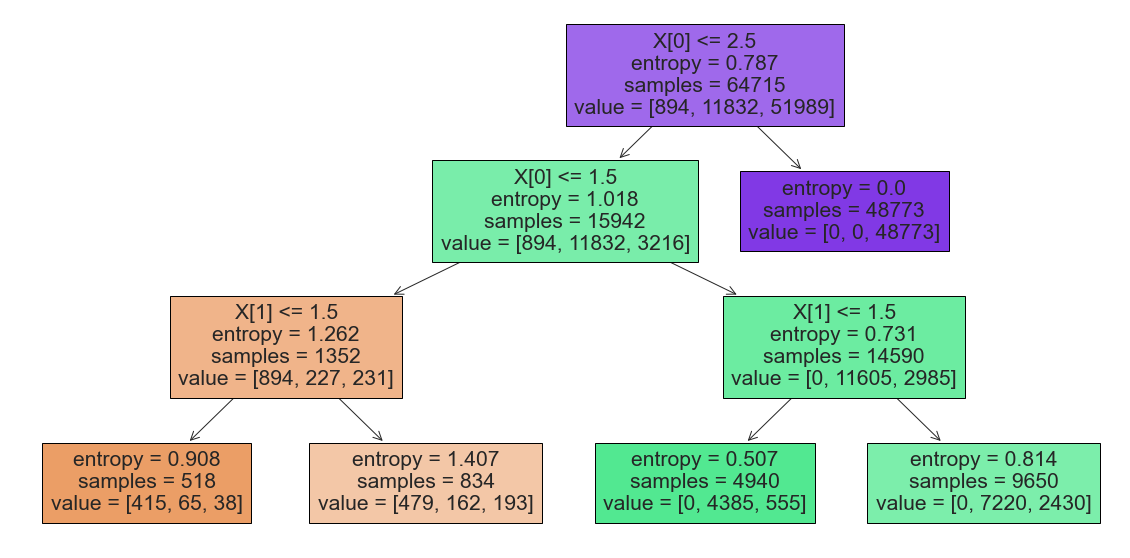

In [55]:
plt.figure(figsize=(20, 10))
plot_tree(arbol, filled = True)
plt.show()

Podemos ver también como han ido siendo las comparaciones que ha ido haciendo el modelo para ir haciendo las divisiones correspondientes.

In [56]:
reglas = export_text(arbol, feature_names = features)
print(reglas)

|--- accident_severity <= 2.50
|   |--- accident_severity <= 1.50
|   |   |--- number_of_vehicles <= 1.50
|   |   |   |--- class: 1
|   |   |--- number_of_vehicles >  1.50
|   |   |   |--- class: 1
|   |--- accident_severity >  1.50
|   |   |--- number_of_vehicles <= 1.50
|   |   |   |--- class: 2
|   |   |--- number_of_vehicles >  1.50
|   |   |   |--- class: 2
|--- accident_severity >  2.50
|   |--- class: 3



Precision final del modelo: (La calculamos comparando los valores reales del conjunto de prueba y los valores predichos.)

In [57]:
print("Accuracy:",metrics.accuracy_score(y_test, pred))

Accuracy: 0.9469623219758428


## Support Vector Machine 

## Gradient Boosted Tree

Los clasificadores de refuerzo de gradiente son un grupo de algoritmos de aprendizaje automático que combinan muchos modelos de aprendizaje débiles para crear un modelo predictivo fuerte. Los árboles de decisión se suelen utilizar cuando se realiza el gradient boosting. Los modelos de gradient boosting se están haciendo populares debido a su eficacia para clasificar conjuntos de datos complejos.

Para implementar un clasificador de refuerzo de gradiente, tendremos que llevar a cabo una serie de pasos diferentes. Tendremos que:

Ajustar el modelo -
Ajustar los parámetros del modelo y los hiperparámetros -
Hacer predicciones -
Interpretar los resultados 

<img src='data/gradient_boosting.png'>

Source: https://stackabuse.com/gradient-boosting-classifiers-in-python-with-scikit-learn/

Primero, ajustamos el modelo de datos y creamos un nuevo dataframe con el vamos a trabajar.

In [58]:
df_traffic_accidents_gbt = df_traffic_accidents.drop(['number_of_casualties','day_of_week', 'did_police_officer_attend_scene_of_accident',
                                                    'sex_of_driver','age_of_vehicle','age_of_driver', 'car_passenger'], axis=1)

In [59]:
df_traffic_accidents_gbt.head()

,accident_severity,number_of_vehicles,sex_of_casualty,age_of_casualty,casualty_severity
0,2,2,1,23,2
1,2,2,1,17,2
2,3,2,1,45,3
3,3,2,1,45,3
4,2,1,1,42,2


Dividimos los datos en los conjuntos de entrenamiento y prueba:

In [60]:
X = df_traffic_accidents_dt.drop('casualty_severity', axis = 1)                                                   
y = df_traffic_accidents_dt.casualty_severity

Realizamos un escalado de nuestros datos con MinMaxScaler

In [62]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Ahora ya podemos dividir los datos en los conjuntos de entrenamiento y prueba, además, establecemos el porcentaje para determinar
la cantidad de datos en cada conjunto.

In [63]:
state = 12  
test_size = 0.30  
  
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,  
    test_size=test_size, random_state=state)

Establecemos diferentes tasas de aprendizaje de modo que podamos comparar el rendimientos del clasificador en esas tasas.

In [64]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gb_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_val, y_val)))

Learning rate:  0.05
Accuracy score (training): 0.942
Accuracy score (validation): 0.944
Learning rate:  0.075
Accuracy score (training): 0.946
Accuracy score (validation): 0.949
Learning rate:  0.1
Accuracy score (training): 0.946
Accuracy score (validation): 0.949
Learning rate:  0.25
Accuracy score (training): 0.946
Accuracy score (validation): 0.948
Learning rate:  0.5
Accuracy score (training): 0.936
Accuracy score (validation): 0.941
Learning rate:  0.75
Accuracy score (training): 0.810
Accuracy score (validation): 0.821
Learning rate:  1
Accuracy score (training): 0.182
Accuracy score (validation): 0.182


Podemos evaluar el clasificador comprobando su precisión y creando una matriz de confusión. 
Procedemos a crear un nuevo clasificador especificando ahora en nuestro "learning_rate" = 0,5

In [65]:
gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.5, max_features=2, max_depth=2, random_state=0)
gb_clf2.fit(X_train, y_train)
predictions = gb_clf2.predict(X_val)

print("Confusion Matrix:")
print(confusion_matrix(y_val, predictions))

print("Classification Report")
print(classification_report(y_val, predictions))

Confusion Matrix:
[[   47     0   208]
 [   18  3304    88]
 [   25   809 14916]]
Classification Report
              precision    recall  f1-score   support

           1       0.52      0.18      0.27       255
           2       0.80      0.97      0.88      3410
           3       0.98      0.95      0.96     15750

    accuracy                           0.94     19415
   macro avg       0.77      0.70      0.70     19415
weighted avg       0.94      0.94      0.94     19415



Vamos a probar utilizando el otro clasificador llamado XGBoost, hacemos las importaciones necesarias

In [66]:
from xgboost import XGBClassifier
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt

<i>XGBoost es una librería de gradient boosting distribuida y optimizada, diseñada para ser altamente eficiente, flexible y portable. Implementa algoritmos de aprendizaje automático bajo el marco del Gradient Boosting. XGBoost proporciona un boosting de árbol paralelo (también conocido como GBDT, GBM) que resuelve muchos problemas de ciencia de datos de forma rápida y precisa.</i>

In [111]:
#Ajustamos y entrenamos nuestro clasificador
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

C:\Users\RICARDO\miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[19:55:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

Con <i><b>score</i></b> podemos verificar la puntuación que se logra en el conjunto de validación.

In [76]:
score = xgb_clf.score(X_val, y_val)
print(score)

0.9477723409734741


El valor (0,94) coincide con el clasificador utilizado en los pasos anteriores.

<Figure size 14400x14400 with 0 Axes>

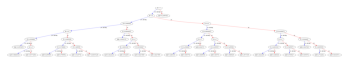

In [112]:
plt.figure(figsize=(200,200))
plot_tree(xgb_clf, num_trees=1)
plt.show()

Los modelos de aumento de gradiente son potentes algoritmos que se pueden utilizar tanto para tareas de clasificación como de regresión. Los modelos de aumento de gradiente pueden funcionar increíblemente bien en conjuntos de datos muy complejos, pero también son propensos a sobreajustarse, lo que puede combatirse con varios de los métodos descritos anteriormente. 